## China Seismological Reference Model (CSRM) - Models and Datasets

- Description:

  - This high-resolution CSRM-1.0 is constructed for the top 100 km of the crust and uppermost mantle in continental China, based on the constraints of the P-wave polarization angle, short-period Rayleigh wave ellipticity from ambient noise, long-period Rayleigh wave ellipticity from earthquake data, receiver function, empirical Green's function, Rayleigh wave phase/group velocity dispersion curves from regional earthquakes, and Pn-wave travel time extracted from seismic data of 4435 seismic stations during 1990 and 2020. The CSRM-1.0 has a spatial crustal resolution of about 60 km beneath the north-south seismic belt and the trans-north China orogen and about 120 km beneath the rest of continental China, and a spatial mantle resolution of about 300 km. The seismic constraints used for the construction of the model consist of the 479,321 polarization angle measurements from the P-wave waveforms of 9361 tele-seismic earthquakes, the short-period (4 - 8 s) Rayleigh wave ellipticity estimated from continuous seismic ambient noise waveforms recorded by 4211 seismic stations, the 622,972 receiver functions calculated based on the waveforms of 9361 tele-seismic events, the 639,171 inter-station empirical Green's functions from seismic ambient noise, the long-period (20 - 80 s) Rayleigh wave ellipticity estimated from earthquake waveform data of 4193 seismic stations, the 54,792 event-staion Rayleigh wave dispersion curves from regional earthquakes, and the 50,867 Pn-wave travel time data. Please click on link for the datasets. Click link for the paper. 

- Reference
  - Xiao, X., Cheng, S., Wu, J., Wang, W., Sun, L., Wang, X., Ma, J., Tong, Y., Liang, X., Li, H., Chen, Q.-F., Yu, S., & Wen, L. (2024). CSRM-1.0: A China Seismological Reference Model [Data set]. Zenodo. https://doi.org/10.5281/zenodo.11098135
  - Wen, L. X., and Yu, S. (2023). The China Seismological Reference Model project. Earth Planet. Phys., 7(5), 521–532. doi: 10.26464/epp2023078
  - Xiao, X., Cheng, S., Wu, J., Wang, W., Sun, L., Wang, X., Ma, J., et al., 2024. CSRM‐1.0: A China Seismological Reference Model. JGR Solid Earth, 129, e2024JB029520. doi:10.1029/2024JB029520


## Observed Dispersion Curves

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d

phase_base_path = "../../../OpenSWI/Datasets/Original/OpenSWI-real/CSRM/PhaseVelocityMaps_CSRM1.0"
group_base_path = "../../../OpenSWI/Datasets/Original/OpenSWI-real/CSRM/GroupVelocityMaps_CSRM1.0"
save_base_path = "../../../OpenSWI/Datasets/OpenSWI-real/CSRM"
phase_files = os.listdir(phase_base_path)
phase_files.sort(key=lambda x: int(x.split(".")[-2].replace("s","")))
group_files = os.listdir(group_base_path)
group_files.sort(key=lambda x: int(x.split(".")[-2].replace("s","")))

In [2]:
# get the period
phase_period = np.array([int(x.split(".")[-2].replace("s","")) for x in phase_files])
group_period = np.array([int(x.split(".")[-2].replace("s","")) for x in group_files])
phase_period,group_period

(array([ 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40,
        42, 44, 46, 48, 50, 54, 58, 62, 66, 70]),
 array([ 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40,
        42, 44, 46, 48, 50, 54, 58, 62, 66, 70]))

In [3]:
import os
import numpy as np

# Initialize an empty list to store station coordinates (longitude and latitude)
disp_loc = []

# Loop through each group velocity file to gather station coordinates
for file in group_files:
    data = np.loadtxt(os.path.join(group_base_path, file))
    lon = data[:, 0]
    lat = data[:, 1]
    group_vel = data[:, 2]
    lon_lat   = data[:, :2]
    disp_loc.append(lon_lat)
disp_loc = np.vstack(disp_loc)
disp_loc = np.unique(disp_loc, axis=0)
lon, lat = disp_loc[:, 0], disp_loc[:, 1]
loc = np.array([f"{lon}_{lat}" for lon, lat in disp_loc])

group_vel = np.zeros((disp_loc.shape[0], len(group_period)))
for i, file in enumerate(group_files):
    data = np.loadtxt(os.path.join(group_base_path, file))
    loc_temp = np.array([f"{data[j, 0]}_{data[j, 1]}" for j in range(len(data))])
    loc_idx  = np.array([np.argwhere(loc == loc_temp[j])[0][0] for j in range(len(data))])
    group_vel[loc_idx, i] = data[:, 2]

mask = np.isnan(group_vel)
group_vel[mask] = -1
group_vel.shape

(20514, 27)

In [4]:
# Initialize a phase velocity matrix with zeros, sized (number of unique stations) x (number of periods)
phase_vel = np.zeros((disp_loc.shape[0], len(phase_period)))
for i, file in enumerate(phase_files):
    data = np.loadtxt(os.path.join(phase_base_path, file))
    loc_temp = np.array([f"{data[j, 0]}_{data[j, 1]}" for j in range(len(data))])
    loc_idx = np.array([np.argwhere(loc == loc_temp[j])[0][0] for j in range(len(data))])
    phase_vel[loc_idx, i] = data[:, 2]
mask = np.isnan(phase_vel)
phase_vel[mask] = -1
phase_vel.shape

(20514, 27)

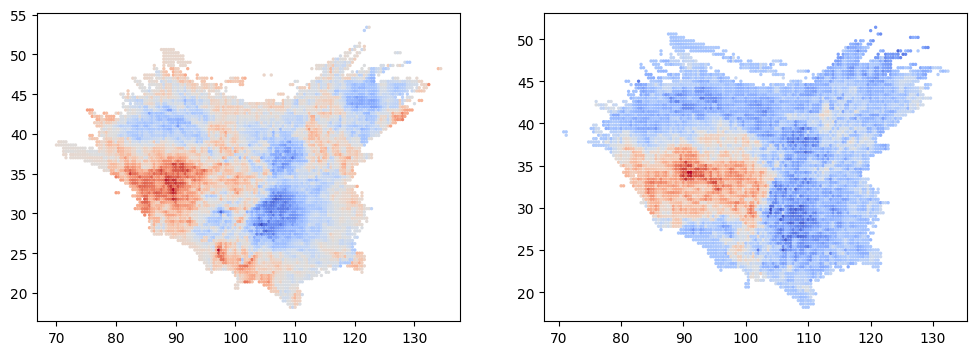

In [5]:
# figure the phase velocity and group velocity
period_idx = 26

plt.figure(figsize=(12,4))
plt.subplot(121)
mask = (phase_vel[:,period_idx]>0) * (disp_loc[:,1]<54) * (disp_loc[:,1]>17.5)
plt.scatter(disp_loc[:,0][mask],disp_loc[:,1][mask],c = phase_vel[:,period_idx][mask],cmap='coolwarm_r',s=2)
plt.subplot(122)
mask = (group_vel[:,period_idx]>0) * (disp_loc[:,1]<54) * (disp_loc[:,1]>17.5)
plt.scatter(disp_loc[:,0][mask],disp_loc[:,1][mask],c = group_vel[:,period_idx][mask],cmap='coolwarm_r',s=2)
plt.show()

In [6]:
# remove the station without data & data length less than 20
mask1 = np.sum(phase_vel>0,axis=1)
mask2 = np.sum(group_vel>0,axis=1)
mask3 = (np.sum(phase_vel>0,axis=1) + np.sum(group_vel>0,axis=1))>20
mask  = mask1*mask2*mask3 >0

disp_loc = disp_loc[mask]
phase_vel = phase_vel[mask]
group_vel = group_vel[mask]

disp_loc.shape

(12901, 2)

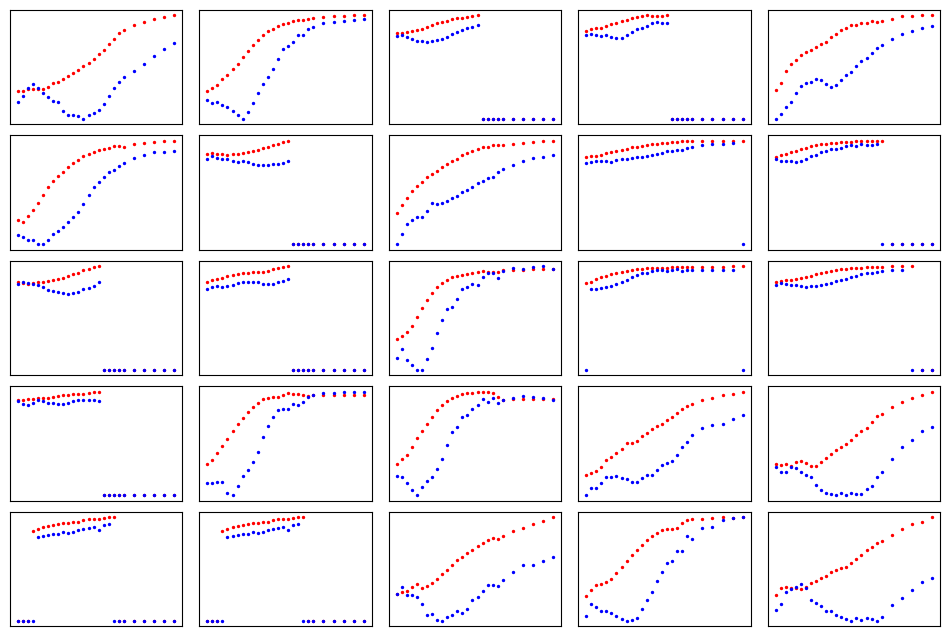

In [7]:
rows = 5
cols = 5
fig,axs = plt.subplots(rows,cols,figsize=(12,8))
for i in range(rows):
    for j in range(cols):
        sta_idx = np.random.randint(0,len(disp_loc))
        axs[i][j].scatter(phase_period,phase_vel[sta_idx,:],c='r',label='phase vel',s=2)
        axs[i][j].scatter(group_period,group_vel[sta_idx,:],c='b',label='group vel',s=2)
        # axs[i][j].set_title(f"Station {sta_idx}")
        axs[i][j].set_xticks([])
        axs[i][j].set_yticks([])

plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

In [8]:
disp_data = np.zeros((phase_vel.shape[0],phase_vel.shape[1],3))
disp_data[...,0] = phase_period
disp_data[...,1] = phase_vel
disp_data[...,2] = group_vel
disp_data.shape

(12901, 27, 3)

## Reference Velocity Model

In [ ]:
vel_base_path = "../../../OpenSWI/Datasets/Original/OpenSWI-real/CSRM/CSRM1.0_2024"

vel_files = os.listdir(vel_base_path)
vel_files.sort(key=lambda x: float(x.split("_")[1]))

In [10]:
vel_depth = np.array([float(file.split("_")[1]) for file in vel_files])

In [11]:
temp_vel = np.loadtxt(os.path.join(vel_base_path,vel_files[0]),skiprows=1)
vel_loc  = temp_vel[:,:2]
# depth vs vp
vel_model = np.zeros((vel_loc.shape[0],vel_depth.shape[0],3))
for i,file in enumerate(vel_files):
    data = np.loadtxt(os.path.join(vel_base_path,file),skiprows=1)
    vel_model[:,i,0] = np.ones(vel_model.shape[0])*vel_depth[i]
    vel_model[:,i,1] = data[:,2]
    vel_model[:,i,2] = data[:,4]
vel_model_mask = vel_model
vel_model.shape,vel_loc.shape

((19478, 241, 3), (19478, 2))

In [12]:
# remove the nan value
mask = np.isnan(vel_model)
mask = mask.sum(axis=1)[:,1]<=0
vel_model = vel_model[mask]
vel_loc = vel_loc[mask]
vel_model.shape,vel_loc.shape

((14351, 241, 3), (14351, 2))

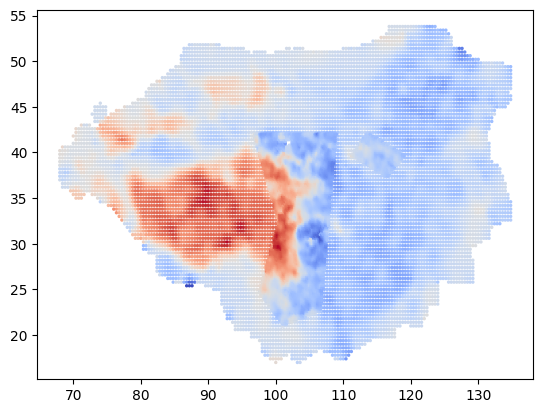

In [13]:
plt.figure()
plt.scatter(vel_loc[:,0],vel_loc[:,1],c=vel_model[:,100,1],cmap='coolwarm_r',s=2)
plt.show()

## Match Dispersion Curve and Velocity Model

In [14]:
disp_loc.shape,vel_loc.shape

((12901, 2), (14351, 2))

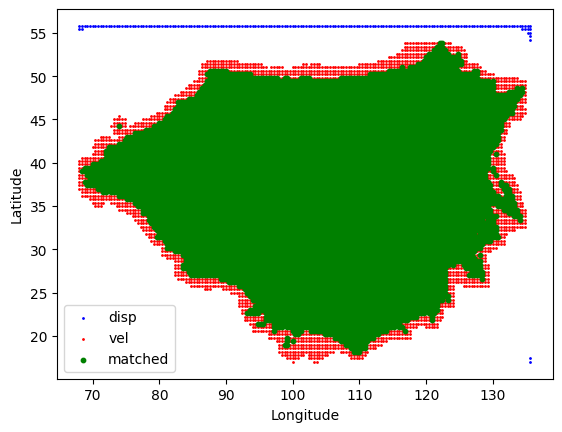

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# convert the longitude and latitude to string, so that we can use the intersection to find the matching points
disp_coords = np.array([f"{disp_loc[i,0]},{disp_loc[i,1]}" for i in range(disp_loc.shape[0])])
vel_coords = np.array([f"{vel_loc[i,0]},{vel_loc[i,1]}" for i in range(vel_loc.shape[0])])

# use np.intersect1d to find the overlapping points
matching_coords_str, disp_indices, vel_indices = np.intersect1d(disp_coords, vel_coords, return_indices=True)

# convert the matching string to float format
matching_coords = np.array([list(map(float, coord.split(','))) for coord in matching_coords_str])

# extract the longitude and latitude
disp_lon, disp_lat       = disp_loc[:, 0], disp_loc[:, 1]
vel_lon, vel_lat         = vel_loc[:, 0], vel_loc[:, 1]
matched_lon, matched_lat = matching_coords[:, 0], matching_coords[:, 1] if matching_coords.size > 0 else ([], [])

# plot the data
plt.figure()
plt.scatter(disp_lon, disp_lat, s=1, label='disp', color='blue')
plt.scatter(vel_lon, vel_lat, s=1, label='vel', color='red')
plt.scatter(matched_lon, matched_lat, s=10, label='matched', color='green')  # matched points
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [16]:
disp_data.shape,vel_model.shape

((12901, 27, 3), (14351, 241, 3))

In [17]:
match_disp = disp_data[disp_indices]
match_vel = vel_model[vel_indices]
match_disp.shape,match_vel.shape

((12705, 27, 3), (12705, 241, 3))

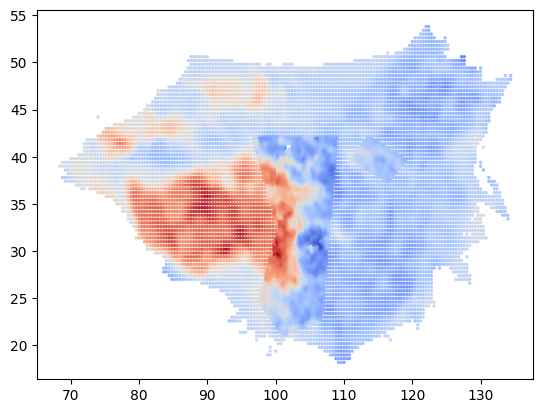

In [18]:
plt.figure()
plt.scatter(matching_coords[:,0],matching_coords[:,1],c=match_vel[:,100,1],cmap='coolwarm_r',s=2)
plt.show()

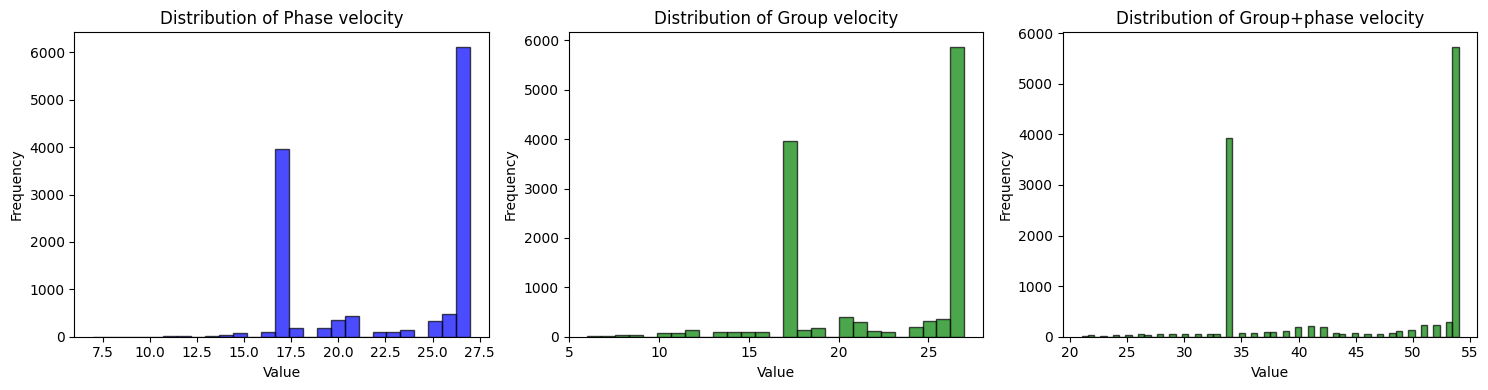

In [19]:
counts_num = np.sum(match_disp>0,axis=1)

phase_data_nums = counts_num[:, 1]
group_data_nums = counts_num[:, 2]

# plot the statistical distribution
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(phase_data_nums, bins=27, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Phase velocity")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(group_data_nums, bins=27, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribution of Group velocity")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.hist(phase_data_nums+group_data_nums, bins=60, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribution of Group+phase velocity")
plt.xlabel("Value")
plt.ylabel("Frequency")

# show the figure
plt.tight_layout()
plt.show()

In [ ]:
# # observed
np.savez(os.path.join(save_base_path,"obs_depth_vs_loc.npz")       ,data=matching_coords)
np.savez(os.path.join(save_base_path,"obs_depth_vs.npz")           ,data=match_vel[:,:,[0,1]])
np.savez(os.path.join(save_base_path,"obs_period_phase_group.npz") ,data=match_disp)

## Synthetic Dispersion Curves

In [21]:
import sys
sys.path.append("../../../")
from SWIDP.dispersion import *

def gen_model(depth,vs,area=False):
    """
    generate the initial model based on empirical formula 
    developed by Thomas M.Brocher (2005).
    ---------------------
    Input Parameters:
        thick : Array(1D) 
            => the thickness of layer 
        vs    : Array(1D)
            => the shear wave velocity
        area  : boolen 
            => the output format
    --------------------
    Output parameters:
        model:Dict 
            the generated model
    """
    depth       = np.array(depth)
    thickness   = np.diff(depth)
    thickness   = np.insert(thickness,-1,thickness[-1]) 
    vs = np.array(vs)
    vp = transform_vs_to_vp(vs)
    mask = depth>120
    vp[mask] = vs[mask]*1.79
    rho = transform_vp_to_rho(vp)
    model = {
        "thick":thickness,
        "vp":vp,
        "vs":vs,
        "rho":rho
    }
    if area:
        return thickness,vp,vs,rho
    else:
        return model

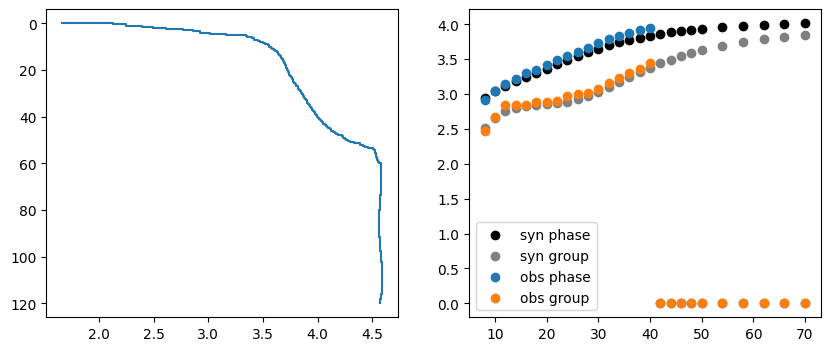

In [22]:
import numpy as np
from disba import PhaseDispersion,GroupDispersion
vel_idx = 4000
depth,vs = match_vel[vel_idx,:,0],match_vel[vel_idx,:,1]
thickness,vp,vs,rho= gen_model(depth=depth,vs=vs,area=True)
vel_model = np.hstack((thickness.reshape(-1,1),vp.reshape(-1,1),vs.reshape(-1,1),rho.reshape(-1,1)))

# Periods must be sorted starting with low periods
t = phase_period

# Compute the 3 first Rayleigh- and Love- wave modal dispersion curves
# Fundamental mode corresponds to mode 0
pd = PhaseDispersion(*vel_model.T)
gd = GroupDispersion(*vel_model.T)
phase_disp = [pd(t, mode=i, wave="rayleigh") for i in range(1)]
group_disp = [gd(t, mode=i, wave='rayleigh') for i in range(1)]


plt.figure(figsize=(10,4))
plt.subplot(121)
plt.step(vs,depth,where='post')
plt.gca().invert_yaxis()

plt.subplot(122)
plt.scatter(phase_disp[0].period,phase_disp[0].velocity,c='k'   ,label="syn phase")
plt.scatter(group_disp[0].period,group_disp[0].velocity,c='gray',label="syn group")

plt.scatter(phase_period,match_disp[vel_idx,:,1],label="obs phase")
plt.scatter(group_period,match_disp[vel_idx,:,2],label="obs group")

plt.legend()
plt.show()

In [24]:
from p_tqdm import p_map
import numpy as np
from disba import PhaseDispersion,GroupDispersion

all_vel_model = []
all_disp = []

def cal_disp(i):
    depth,vs = match_vel[i,:,0],match_vel[i,:,1]
    thickness,vp,vs,rho= gen_model(depth=depth,vs=vs,area=True)
    vel_model = np.hstack((thickness.reshape(-1,1),vp.reshape(-1,1),vs.reshape(-1,1),rho.reshape(-1,1)),dtype=np.float64)
    
    # Periods must be sorted starting with low periods
    t = phase_period

    # Compute the 3 first Rayleigh- and Love- wave modal dispersion curves
    # Fundamental mode corresponds to mode 0
    pd = PhaseDispersion(*vel_model.T,dc=0.001)
    gd = GroupDispersion(*vel_model.T,dc=0.001)
    phase_disp = pd(t, mode=0, wave="rayleigh")
    group_disp = gd(t, mode=0, wave='rayleigh')
    
    vel_model = np.hstack((depth.reshape(-1,1),vp.reshape(-1,1),vs.reshape(-1,1),rho.reshape(-1,1)))
    disp_data = np.hstack((t.reshape(-1,1),phase_disp.velocity.reshape(-1,1),group_disp.velocity.reshape(-1,1)))
    return vel_model,disp_data

pmap_out        = p_map(cal_disp,np.arange(match_vel.shape[0]))
all_vel_model   = np.array([pmap_out[i][0] for i in range(len(pmap_out))])
all_disp        = np.array([pmap_out[i][1] for i in range(len(pmap_out))])

all_vel_model.shape, all_disp.shape

  0%|          | 0/12705 [00:00<?, ?it/s]

In [ ]:
# synthetic data
np.savez(os.path.join(save_base_path,"syn_depth_vs.npz")           ,data=all_vel_model[:,:,[0,2]])
np.savez(os.path.join(save_base_path,"syn_period_phase_group.npz") ,data=all_disp)